In [48]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

In [18]:
data = pd.read_csv('backpain.csv')
data.shape

(310, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


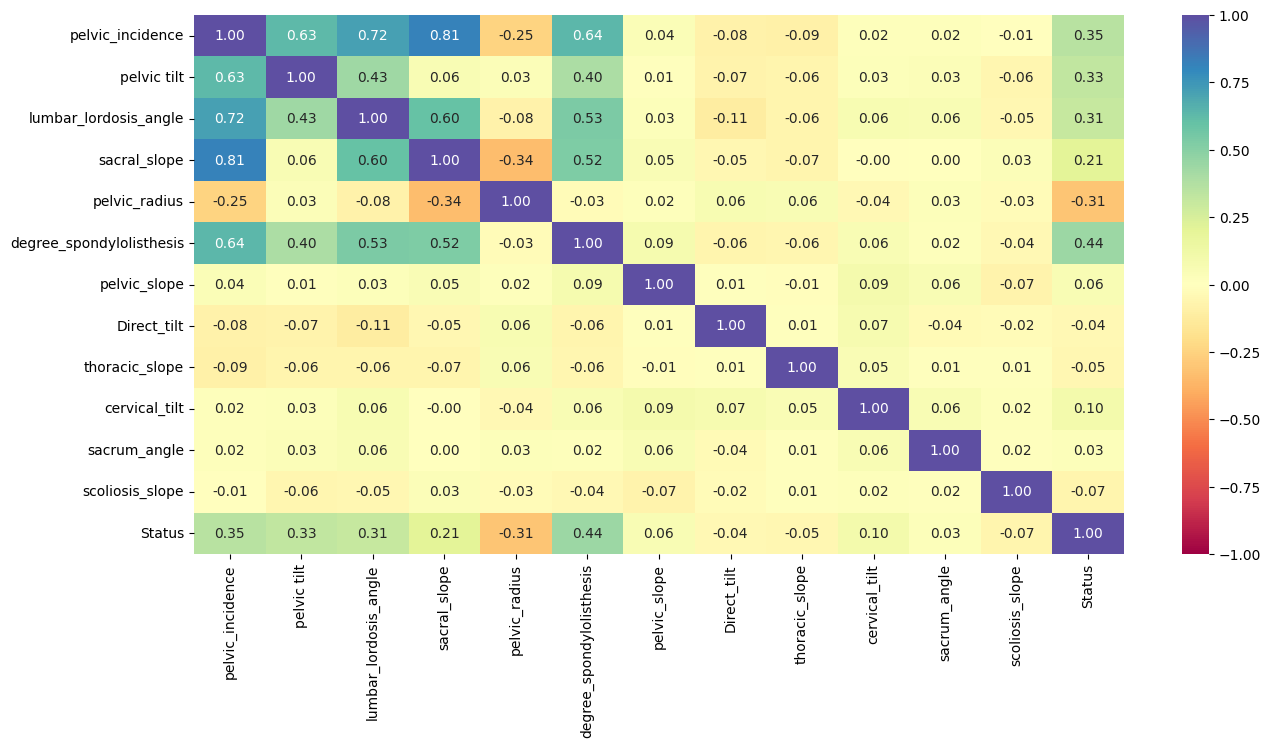

In [62]:
# Load the dataset and identify the variables that hold the highest correlation.
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [21]:
#Encode Status variable: Abnormal class to 1 and Normal to 0.

data.head()
data['Status'].value_counts()

status_to_code = {
    'Abnormal': 1,
    'Normal': 0
}

data['Status'] = data['Status'].map(status_to_code)


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,0


In [26]:
#Split the data into a 70:30 ratio. What is the percentage of 0 and 1 classes in the train data (y_train)?
X = data.drop(['Status'], axis =1)
y = data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.663594
0    0.336406
Name: Status, dtype: float64
Percentage of classes in test set:
1    0.709677
0    0.290323
Name: Status, dtype: float64


In [35]:
#Train a decision tree model with default parameters and vary the depth from 1 to 8 (both values included) and compare the model performance at each value of depth
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(1, 9, 1)

# Initialize variables to store the best model and its performance
best_estimator = None
best_train_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:    

    # Initialize the tree with the current set of parameters
    estimator = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=1
    )

    # Fit the model to the training data
    estimator.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = estimator.predict(X_train)
    y_test_pred = estimator.predict(X_test)

    # Calculate recall scores for training and test sets
    train_recall_score = recall_score(y_train, y_train_pred)
    test_recall_score = recall_score(y_test, y_test_pred)

    # Calculate the absolute difference between training and test recall scores
    score_diff = abs(train_recall_score - test_recall_score)

    print("Parameters found:")
    print(f"Max depth: {estimator.max_depth}")
    print(f"Max leaf nodes: {estimator.max_leaf_nodes}")
    print(f"Min samples split: {estimator.min_samples_split}")
    print(f"Train recall score: {train_recall_score}")
    print("#####################")
    # Update the best estimator and best score if the current one has a smaller score difference
    if (train_recall_score > best_train_score):
        best_train_score = train_recall_score
        best_estimator = estimator
   
# creating an instance of the best model
model1 = best_estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best train recall score: {best_train_score}")



Parameters found:
Max depth: 1
Max leaf nodes: None
Min samples split: 2
Train recall score: 0.6875
#####################
Parameters found:
Max depth: 2
Max leaf nodes: None
Min samples split: 2
Train recall score: 0.8888888888888888
#####################
Parameters found:
Max depth: 3
Max leaf nodes: None
Min samples split: 2
Train recall score: 0.8888888888888888
#####################
Parameters found:
Max depth: 4
Max leaf nodes: None
Min samples split: 2
Train recall score: 0.9583333333333334
#####################
Parameters found:
Max depth: 5
Max leaf nodes: None
Min samples split: 2
Train recall score: 0.9652777777777778
#####################
Parameters found:
Max depth: 6
Max leaf nodes: None
Min samples split: 2
Train recall score: 0.9930555555555556
#####################
Parameters found:
Max depth: 7
Max leaf nodes: None
Min samples split: 2
Train recall score: 0.9861111111111112
#####################
Parameters found:
Max depth: 8
Max leaf nodes: None
Min samples split: 2
T

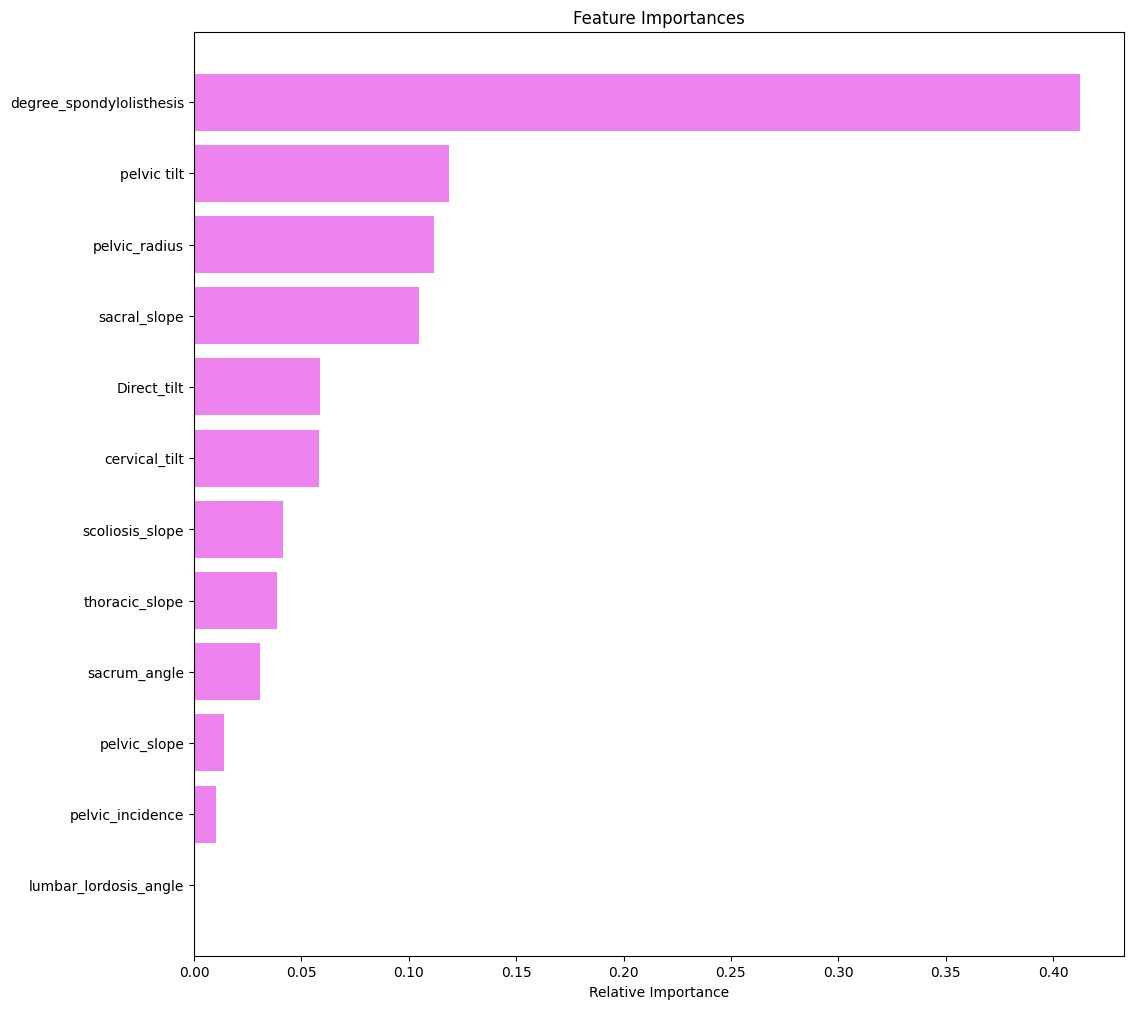

In [36]:
#Plot the feature importance of the variables given by the model which gives the maximum value of recall on the training set in Q3.
column_names = list(X.columns)
feature_names = column_names
importances = best_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [59]:
# Depth based best model
# Define the parameters of the tree to iterate over
max_depth_values = [5,10,15,None]

# Initialize variables to store the best model and its performance
best_estimator_by_depth = None
best_score_diff_by_depth = float('inf')
best_test_score_by_depth = 0.0
best_f1_score = float('inf')


# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:

    # Initialize the tree with the current set of parameters
    estimator = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=1
    )

    # Fit the model to the training data
    estimator.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = estimator.predict(X_train)
    y_test_pred = estimator.predict(X_test)

    # Calculate recall scores for training and test sets
    train_recall_score = recall_score(y_train, y_train_pred)
    test_recall_score = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)


    # Calculate the absolute difference between training and test recall scores
    score_diff = abs(train_recall_score - test_recall_score)

    # Update the best estimator and best score if the current one has a smaller score difference
    if (score_diff < best_score_diff_by_depth) & (test_recall_score > best_test_score_by_depth):
        best_score_diff_by_depth = score_diff
        best_test_score_by_depth = test_recall_score
        best_estimator_by_depth = estimator
        best_f1_score = test_f1_score
        

# creating an instance of the best model

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator_by_depth.max_depth}")
print(f"Max leaf nodes: {best_estimator_by_depth.max_leaf_nodes}")
print(f"Min samples split: {best_estimator_by_depth.min_samples_split}")
print(f"Best test recall score: {best_test_score_by_depth}")
print(f"Best f1 score: {best_f1_score}")


Best parameters found:
Max depth: 5
Max leaf nodes: None
Min samples split: 2
Best test recall score: 0.7727272727272727
Best f1 score: 0.8292682926829268


In [61]:
# Define the parameters of the tree to iterate over
max_depth_values = [5,10,15,None]
criterions = ['gini','entropy']
splitters = ['best','random']

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0
best_f1_score = float('inf')
# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for criterion in criterions:
        for splitter in splitters:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                splitter=splitter,
                criterion=criterion,
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)
            test_f1_score = f1_score(y_test, y_test_pred)


            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator
                best_f1_score = test_f1_score

# creating an instance of the best model
model1 = best_estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"criterion: {best_estimator.criterion}")
print(f"splitter: {best_estimator.splitter}")
print(f"Best test recall score: {best_test_score}")
print(f"Best f1 score: {best_f1_score}")


Best parameters found:
Max depth: 5
Max leaf nodes: None
Min samples split: 2
criterion: gini
splitter: random
Best test recall score: 0.8636363636363636
Best f1 score: 0.8636363636363636


In [60]:
# default params

model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
default_test_recall_score = recall_score(y_test, y_test_pred)
default_test_f1_score = f1_score(y_test, y_test_pred)

print(f'Default recall: {default_test_recall_score}, Default F1 : {default_test_f1_score}')


Default recall: 0.7878787878787878, Default F1 : 0.832
